# Data Preprocessing & Exploratory Data Analysis (EDA)

## 1. Data Understanding
Dataset yang akan digunakan adalah kumpulan data sentiment yang berasal dari pengguna twitter saat pelaksanaan PILPRES 2019 lalu.<br>
Terdiri dari 1815 data tweet yang memuat tiga kategori sentiment yaitu Positif, Netral dan Negatif.<br>
Setiap tweet memuat teks yang mengandung salah satu sentiment yang ada, sehingga memungkinkan untuk melakukan pelatihan model untuk mempelajari teks dengan karakteristik sentiment terkait sehingga sangat berguna dalam pengembangan teknologi analisis sentiment secara otomatis.<br><br>
Link Dataset: https://drive.google.com/drive/folders/181Wz2fJuw8KCizXi5aANlM--52NwPw96

## 2. Data Cleansing & Preprocessing
1. Check missing values
2. Remove URLs
3. Extract hashtags (#) and mentions (@)
4. Remove special characters
5. Lowercase text
6. Stop Words Removal
7. Stemming & Lemmatization

<b>Import required libraries</b>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, average_precision_score

<b>Load the dataset</b>

In [ ]:
df = pd.read_csv('tweet.csv', index_col=[0], encoding='utf-8')
df

,sentimen,tweet
0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib..."
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik...."
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p..."
4,negatif,Negara kita ngutang buat bngun infrastruktur y...
...,...,...
1810,netral,Negarawan sejati sll bangga dan mengedepankan ...
1811,netral,1. HRS ceramah di Damai Indonesiaku 2. Perekon...
1812,netral,Mari bangun bangsa dgn mendukung perekonomian ...
1813,netral,Bantu majukan perekonomian bangsa bersama Pak ...


<b>Data type info</b>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1815 entries, 0 to 1814
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentimen  1815 non-null   object
 1   tweet     1815 non-null   object
dtypes: object(2)
memory usage: 42.5+ KB


<b>Check missing values</b>

In [ ]:
df.isna().sum()

sentimen    0
tweet       0
dtype: int64

<b>Function to clean text using Regex</b><br>
- Remove special characters, punctuations, URLs, irrelevant symbols, and double whitespaces<br>
- Keep only letters, numbers, hashtags, and mentions, then convert to lowercases.

In [ ]:
def clean_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s#@:,/\.\-]', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'pic\.twitter\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'\?', ' ', text)
    text = re.sub(r'!', ' ', text)
    text = re.sub(r',', ' ', text)
    text = re.sub(r':', ' ', text)
    text = re.sub(r'\-', ' ', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'\.+', ' ', text)
    text = re.sub(r'\.', '', text)
    text = re.sub(r'^\s+|\s+$', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    return text

<b>Function to extract Hashtags and Mentions</b>

In [ ]:
def extract_hashtags(text):
    return re.findall(r'#\w+', text)

def extract_mentions(text):
    return re.findall(r'@\w+', text)

<b>Sample text cleaning</b>

In [ ]:
df['tweet'][0]

'Kata @prabowo Indonesia tidak dihargai bangsa asing!   Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â\xa0â€¦'

In [ ]:
clean_text(df['tweet'][0])

'kata indonesia tidak dihargai bangsa asing berita ini pasti hoax buatan penguasa ya kan'

<b>Sample mention (@) extraction</b>

In [ ]:
extract_mentions(df['tweet'][0])

['@prabowo', '@rockygerung']

<b>Sample hashtag (#) extraction</b>

In [ ]:
df['tweet'][16]

'#PilihOrangBaik #PilihJelasIslamnya #PilihBajuPutih  Pentingnya sisi industri kreatif dan inovatif di era industri global. Membuat jokowi tergerak untuk mengubah Badan Ekonomi Kreatif (Bekraf) menjadi sebuah kementerian . Coblos 01 Yuk Kerja Pasti !  pic.twitter.com/4VPqiGzAcq'

In [ ]:
clean_text(df['tweet'][16])

'pentingnya sisi industri kreatif dan inovatif di era industri global membuat jokowi tergerak untuk mengubah badan ekonomi kreatif bekraf menjadi sebuah kementerian coblos 01 yuk kerja pasti'

In [ ]:
extract_hashtags(df['tweet'][16])

['#PilihOrangBaik', '#PilihJelasIslamnya', '#PilihBajuPutih']

<b>Define: Stop Word Removal, Stemming, Lemmatization</b>

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nlp_id.stopword import StopWord
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nlp_id.lemmatizer import Lemmatizer

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Willy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Willy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def stopword_nltk(text):
    id_stopwords = stopwords.words('indonesian')
    tokens = word_tokenize(text)
    filtered_words = [word for word in tokens if word.lower() not in id_stopwords]
    result = ' '.join(filtered_words)
    return result

In [ ]:
def stopword_nlp_id(text):
    stop_word = StopWord()
    result = stop_word.remove_stopword(text)
    return result

In [ ]:
def stopword_sastrawi(text):
    factory = StopWordRemoverFactory()
    stopwords = factory.create_stop_word_remover()
    result = stopwords.remove(text)
    return result

In [ ]:
def stemming_sastrawi(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    result = stemmer.stem(text)
    return result

In [ ]:
def stem_lemmatizer_nlp_id(text):
    lemmatizer = Lemmatizer()
    result = lemmatizer.lemmatize(text)
    return result

<b>Sample Stop Words Removal comparison: [NLTK | nlp-id | Sastrawi]</b>

In [ ]:
clean_text(df['tweet'][37])

'kalau infrastructure yg di bangun pakai uang pribadi dia boleh lah yg ga mendukung untuk tidak lewat sana tp ini pakai pajak dr semua warga negara dan setiap lewat pun harus bayar'

In [ ]:
stopword_nltk(clean_text(df['tweet'][37]))

'infrastructure yg bangun pakai uang pribadi yg ga mendukung tp pakai pajak dr warga negara bayar'

In [ ]:
stopword_nlp_id(clean_text(df['tweet'][37]))

'infrastructure bangun pakai uang pribadi ga mendukung tp pakai pajak dr warga negara bayar'

In [ ]:
stopword_sastrawi(clean_text(df['tweet'][37]))

'infrastructure yg bangun pakai uang pribadi yg ga mendukung tp pakai pajak dr warga negara bayar'

<b>Sample Stemming / Lemmatization comparison: [nlp-id | Sastrawi]</b>

In [ ]:
clean_text(df['tweet'][4])

'negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat terus masyarakatnya ngeluh karena negara ngutang setiap negara itu pasti ngutang utang bisa dibayar kalo negara dapet penghasilan penghasilan negara itu ya dari pajak'

In [ ]:
stemming_sastrawi(clean_text(df['tweet'][4]))

'negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat terus masyarakat ngeluh karena negara ngutang tiap negara itu pasti ngutang utang bisa bayar kalo negara dapet hasil hasil negara itu ya dari pajak'

In [ ]:
stem_lemmatizer_nlp_id(clean_text(df['tweet'][4]))

'negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat terus masyarakat ngeluh karena negara ngutang tiap negara itu pasti ngutang utang bisa bayar kalo negara dapet hasil hasil negara itu ya dari pajak'

<b>Apply text preprocessing</b>

In [ ]:
df['text_cleansed'] = df['tweet'].apply(clean_text)
df['stopworded'] = df['text_cleansed'].apply(stopword_nlp_id)
#df['stopworded_stemmed'] = df['stopworded'].apply(stem_lemmatizer_nlp_id)
df['hashtags'] = df['tweet'].apply(extract_hashtags)
df['mentions'] = df['tweet'].apply(extract_mentions)
df['tweet_length'] = df['tweet'].apply(len)

In [ ]:
df

,sentimen,tweet,text_cleansed,stopworded,hashtags,mentions,tweet_length
0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...,kata indonesia tidak dihargai bangsa asing ber...,indonesia dihargai bangsa asing berita hoax bu...,[],"[@prabowo, @rockygerung]",195
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib...",batuan langka tasbih jokowi hadiah dari habib ...,batuan langka tasbih jokowi hadiah habib luthf...,[],[],93
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik....",di era jokowi ekonomi indonesia semakin baik,era jokowi ekonomi indonesia,"[#01IndonesiaMaju, #JokowiLagi, #JokowiMenangT...",[],126
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p...",bagi sumatera selatan asian games berdampak pd...,sumatera selatan asian games berdampak pd ekon...,[],[],128
4,negatif,Negara kita ngutang buat bngun infrastruktur y...,negara kita ngutang buat bngun infrastruktur y...,negara ngutang bngun infrastruktur dipake masy...,[],[],244
...,...,...,...,...,...,...,...
1810,netral,Negarawan sejati sll bangga dan mengedepankan ...,negarawan sejati sll bangga dan mengedepankan ...,negarawan sejati sll bangga mengedepankan harg...,[#2019GantiPresiden],[],99
1811,netral,1. HRS ceramah di Damai Indonesiaku 2. Perekon...,1 hrs ceramah di damai indonesiaku 2 perekonom...,1 hrs ceramah damai indonesiaku 2 perekonomian...,[#PutihkanGBK],[],80
1812,netral,Mari bangun bangsa dgn mendukung perekonomian ...,mari bangun bangsa dgn mendukung perekonomian ...,mari bangun bangsa dgn mendukung perekonomian ...,[],[],148
1813,netral,Bantu majukan perekonomian bangsa bersama Pak ...,bantu majukan perekonomian bangsa bersama pak ...,bantu majukan perekonomian bangsa jokowi yuk,[],[],121


In [ ]:
df = df.drop(['tweet'], axis=1)
df = df.drop(['text_cleansed'], axis=1)
#df = df.drop(['stopworded'], axis=1)

In [ ]:
df = df.rename(columns={"stopworded": 'tweet',
                        "hashtags": 'hashtags',
                        "mentions": 'mentions'})
df

,sentimen,tweet,hashtags,mentions,tweet_length
0,negatif,indonesia dihargai bangsa asing berita hoax bu...,[],"[@prabowo, @rockygerung]",195
1,netral,batuan langka tasbih jokowi hadiah habib luthf...,[],[],93
2,netral,era jokowi ekonomi indonesia,"[#01IndonesiaMaju, #JokowiLagi, #JokowiMenangT...",[],126
3,positif,sumatera selatan asian games berdampak pd ekon...,[],[],128
4,negatif,negara ngutang bngun infrastruktur dipake masy...,[],[],244
...,...,...,...,...,...
1810,netral,negarawan sejati sll bangga mengedepankan harg...,[#2019GantiPresiden],[],99
1811,netral,1 hrs ceramah damai indonesiaku 2 perekonomian...,[#PutihkanGBK],[],80
1812,netral,mari bangun bangsa dgn mendukung perekonomian ...,[],[],148
1813,netral,bantu majukan perekonomian bangsa jokowi yuk,[],[],121


In [ ]:
df.to_csv('test.csv', index=False)

## 3. Exploratory Data Analysis (EDA)
1. Data Statistics and Column Type
2. Sentiment Distribution
3. Extract information from Tweets (Hashtags, Mentions)
4. Visualize the most frequent hashtags and user mentions
5. Visualize tweet length distribution
6. Visualize most frequent words in Positive, Neutral, and Negative using WordCloud

<b>Data Statistics</b>

In [ ]:
df.describe()

,tweet_length
count,1815.000000
mean,194.669972
std,75.533506
min,27.000000
25%,134.000000
50%,200.000000
75%,258.000000
max,668.000000


<b>Data Column Type</b>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1815 entries, 0 to 1814
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sentimen      1815 non-null   object
 1   tweet         1815 non-null   object
 2   hashtags      1815 non-null   object
 3   mentions      1815 non-null   object
 4   tweet_length  1815 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 149.6+ KB


<b>Count Sentiment Distribution</b>

In [ ]:
len_negative = len(df[df['sentimen'] == 'negatif']['sentimen'])
len_neutral = len(df[df['sentimen'] == 'netral']['sentimen'])
len_positive = len(df[df['sentimen'] == 'positif']['sentimen'])

print("Sentiment Distribution:")
print("Negatif:", len_negative)
print("Netral:", len_neutral)
print("Positive:", len_positive)

Sentiment Distribution:
Negatif: 596
Netral: 607
Positive: 612


<b>Visualize Sentiment Distribution (Bar Chart & Pie Chart)</b>

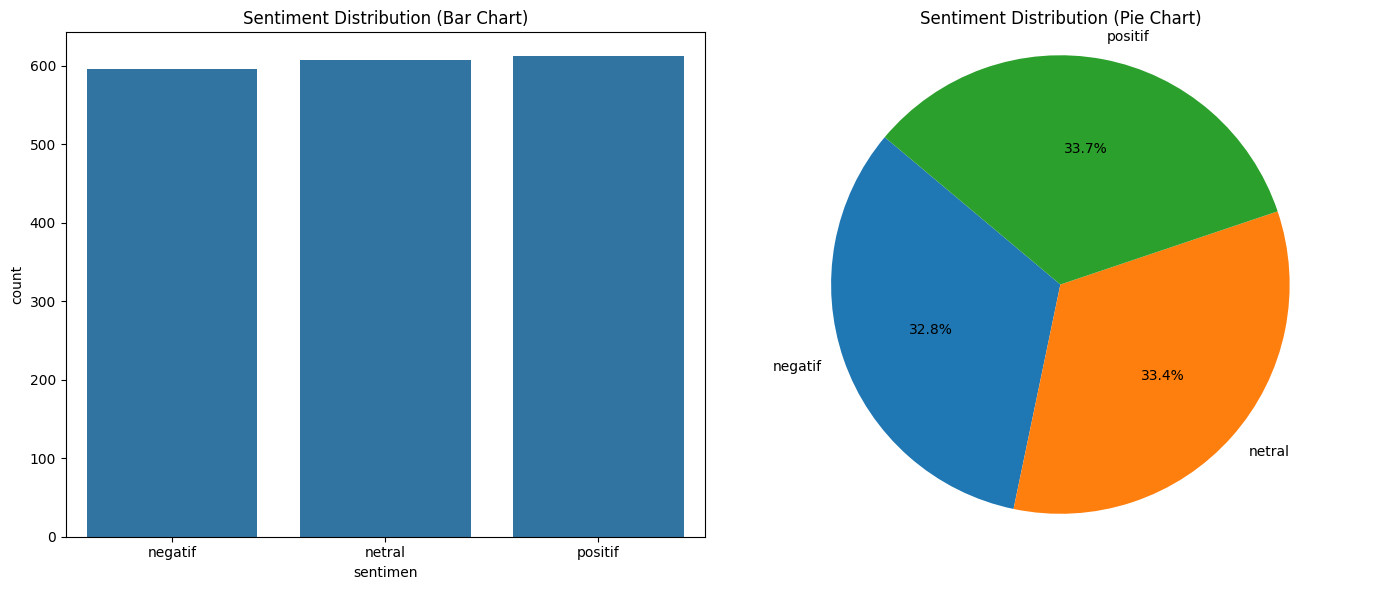

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
sns.countplot(x='sentimen', data=df, ax=ax1)
ax1.set_title('Sentiment Distribution (Bar Chart)')

sentiment_counts = df['sentimen'].value_counts().iloc[::-1]
ax2.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
ax2.set_title('Sentiment Distribution (Pie Chart)')
ax2.axis('equal')

plt.tight_layout()
plt.show()

<b>Count the most frequent Hashtags</b>

In [ ]:
hashtags = df.explode('hashtags')
top_hashtags = hashtags['hashtags'].value_counts().head(10)
top_hashtags

hashtags
#PrabowoSalahkanSBY          90
#PilihOrangBaik              61
#PilihBajuPutih              60
#JokowiMenangTotalDebat      55
#PilihJelasIslamnya          55
#UASdifitnahKejiDanBrutal    34
#DebatPilpres2019            22
#TusukPrabowoSandi           21
#2019GantiPresiden           20
#YourTurnBro                 18
Name: count, dtype: int64

<b>Visualize the most frequent Hashtags</b>

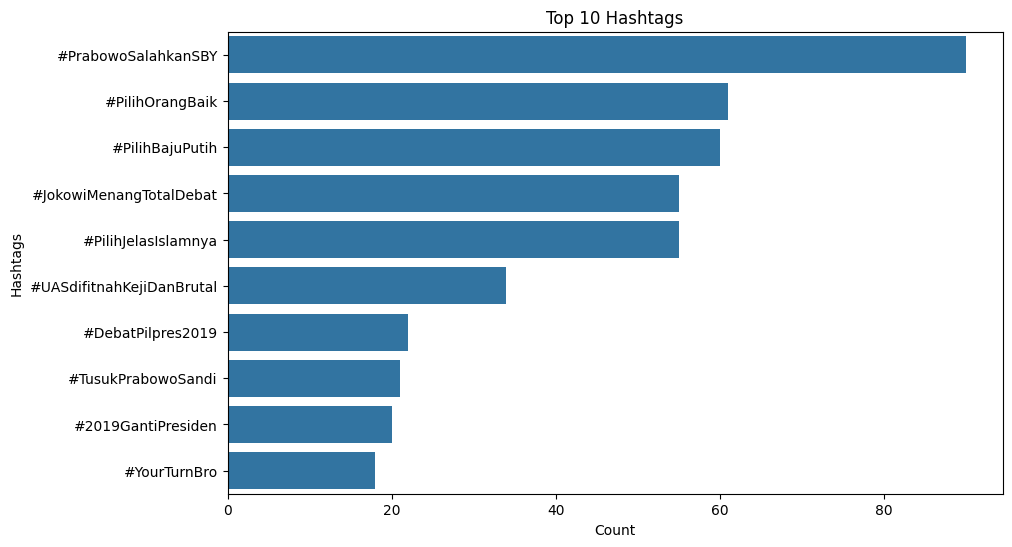

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_hashtags.values, y=top_hashtags.index)
plt.title('Top 10 Hashtags')
plt.xlabel('Count')
plt.ylabel('Hashtags')
plt.show()

<b>Count the most frequent mentioned users</b>

In [ ]:
mentions = df.explode('mentions')
top_mentions = mentions['mentions'].value_counts().head(10)
top_mentions

mentions
@jokowi          233
@prabowo         148
@sandiuno        108
@Jokowi           18
@KHMarufAmin_     13
@SBYudhoyono      10
@saaebunglon       8
@sukangetweet      8
@bocahsosmed       8
@kumparannews      7
Name: count, dtype: int64

<b>Visualize the most frequent mentioned users</b>

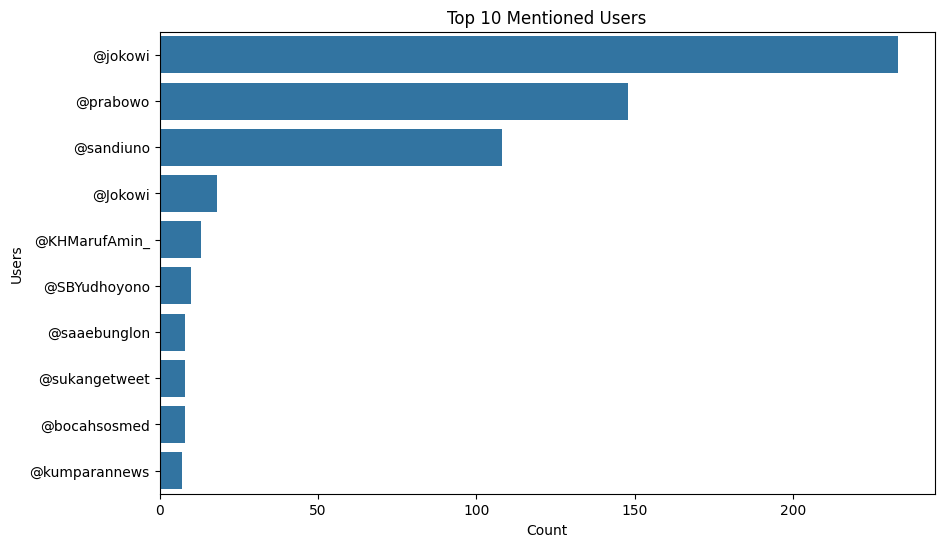

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_mentions.values, y=top_mentions.index)
plt.title('Top 10 Mentioned Users')
plt.xlabel('Count')
plt.ylabel('Users')
plt.show()

<b>Visualize tweet length distribution</b>

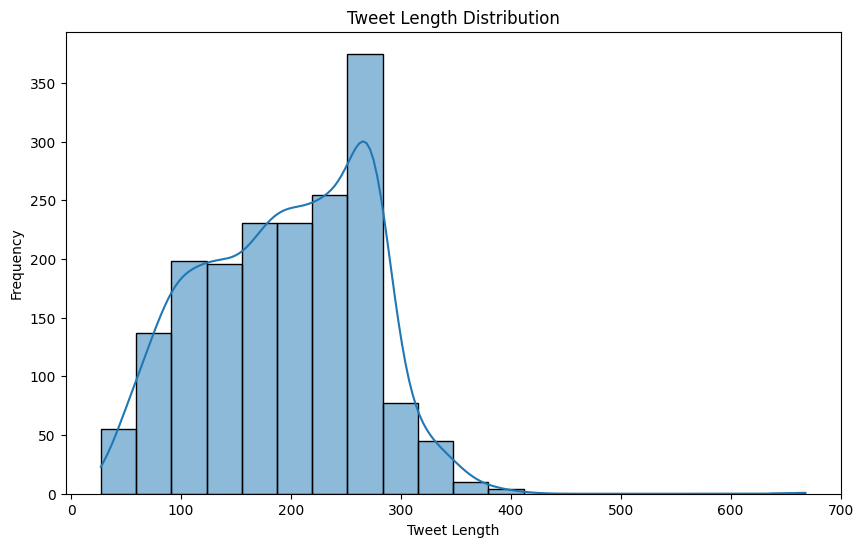

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['tweet_length'], bins=20, kde=True)
plt.title('Tweet Length Distribution')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

<b>Define the Stop Words for WordCloud</b>

In [ ]:
stop_word = StopWord()
id_stopwords = stop_word.get_stopword()
len(id_stopwords)

1168

<b>Visualize Positive Sentiments to WordCloud</b>

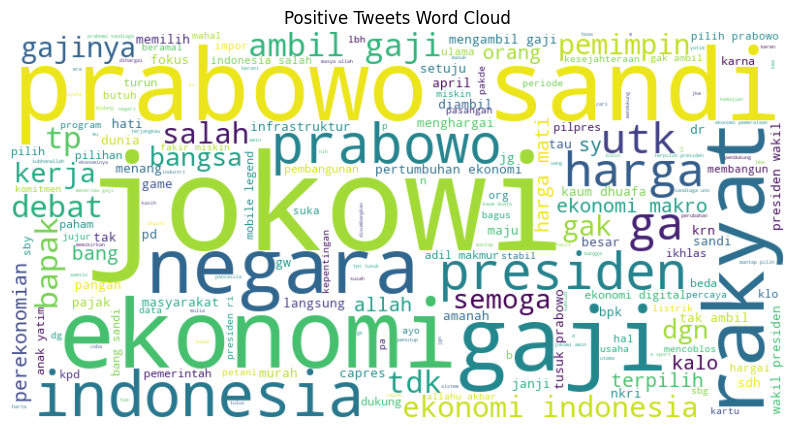

In [ ]:
positive_words = ' '.join(df[df['sentimen'] == 'positif']['tweet'])
wordcloud = WordCloud(stopwords=id_stopwords, background_color='white', width=800, height=400).generate(positive_words)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Positive Tweets Word Cloud')
plt.axis('off')
plt.show()

<b>Visualize Neutral Sentiments to WordCloud</b>

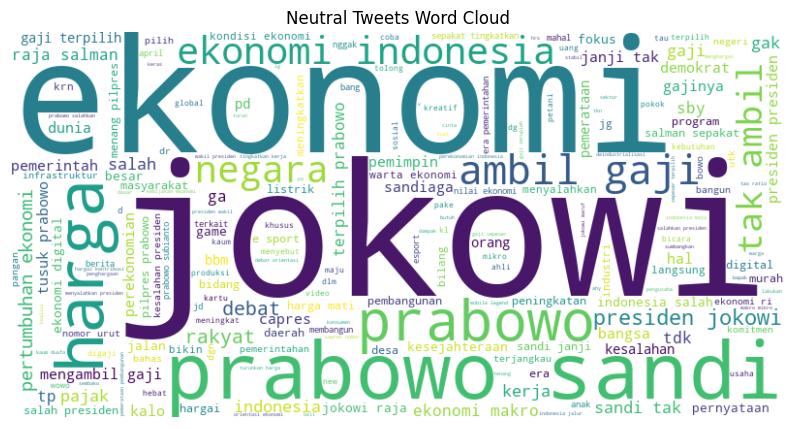

In [ ]:
neutral_words = ' '.join(df[df['sentimen'] == 'netral']['tweet'])
wordcloud = WordCloud(stopwords=id_stopwords, background_color='white', width=800, height=400).generate(neutral_words)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Neutral Tweets Word Cloud')
plt.axis('off')
plt.show()

<b>Visualize Negative Sentiments to WordCloud</b>

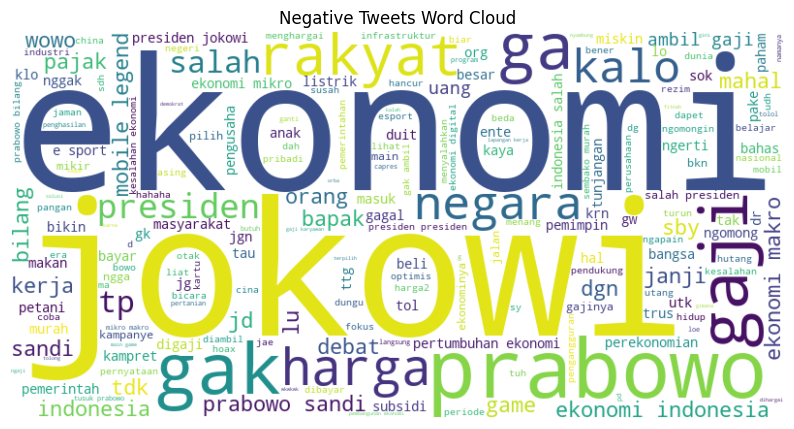

In [ ]:
negative_words = ' '.join(df[df['sentimen'] == 'negatif']['tweet'])
wordcloud = WordCloud(stopwords=id_stopwords, background_color='white', width=800, height=400).generate(negative_words)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Negative Tweets Word Cloud')
plt.axis('off')
plt.show()